In [1]:
%matplotlib inline

import rdkit # compchem library
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole # use this to draw molecules in the notebook
from rdkit import rdBase
print(rdBase.rdkitVersion)

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

2018.09.1


Data for this exercise taken from the [DUD-E validation dataset](http://dude.docking.org/targets/try1).

In [2]:
def get_mols(smi_file):
    mols = []
    with open(smi_file) as f:
        for l in f:
            mols.append(l.split()[0])
    return mols

In [3]:
n = 200 # balance sets equally
actives = [ Chem.MolFromSmiles(m) for m in get_mols('./data/try1_actives_final.ism')[:n] ]
decoys = [ Chem.MolFromSmiles(m) for m in get_mols('./data/try1_decoys_final.ism')[:n] ]

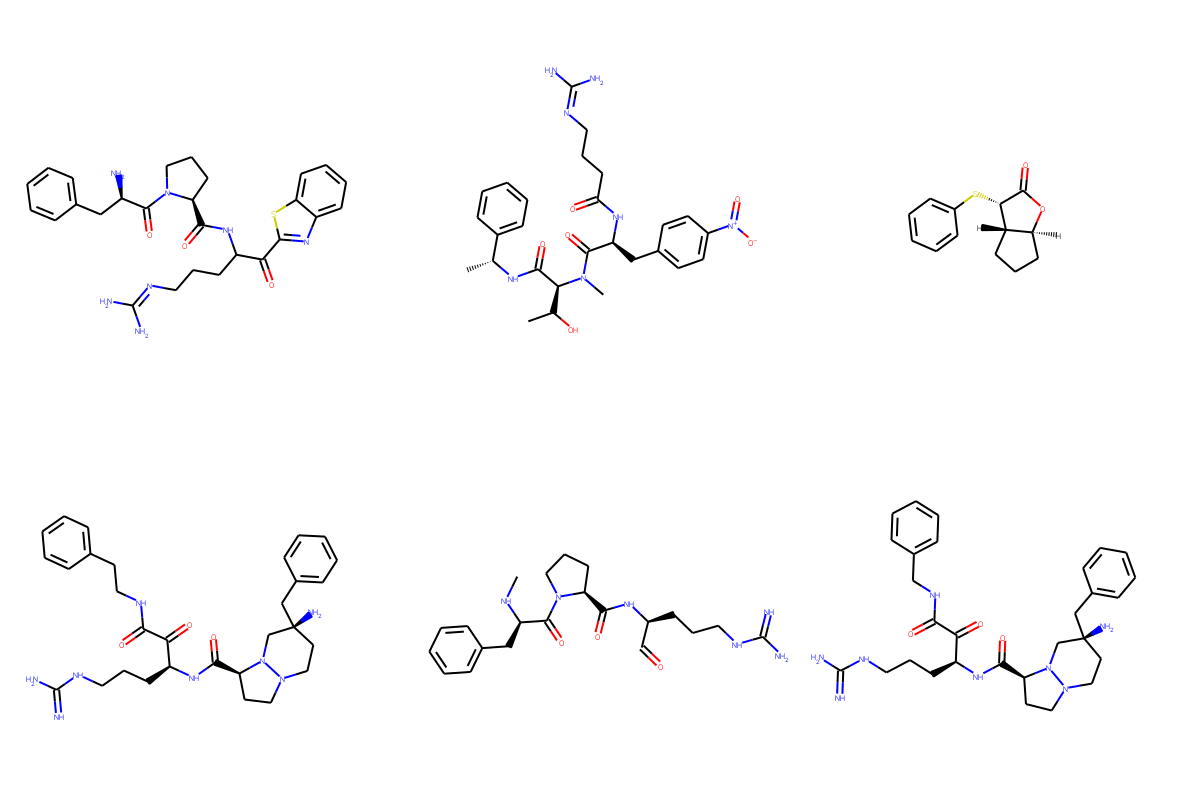

In [4]:
img = Draw.MolsToGridImage( actives[:6], molsPerRow=3, subImgSize=(400, 400))
img

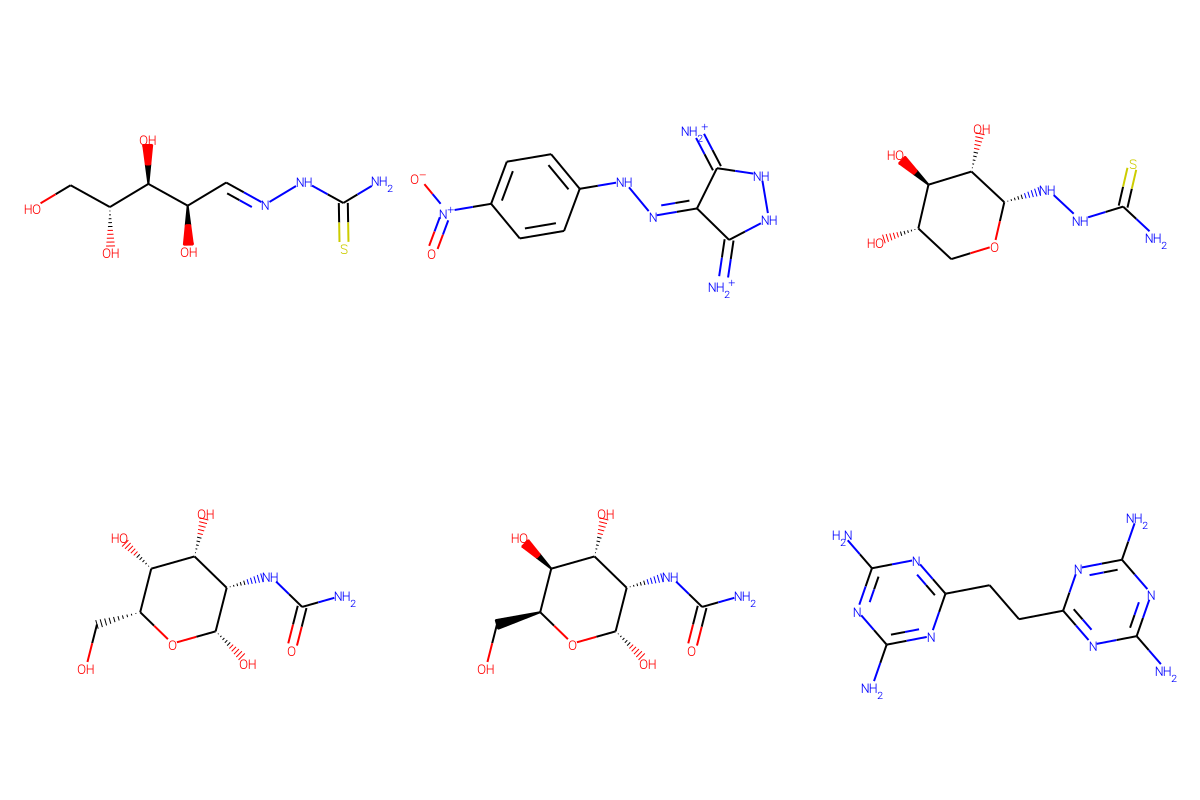

In [5]:
img = Draw.MolsToGridImage( decoys[:6], molsPerRow=3, subImgSize=(400, 400))
img

We need to generate properties for each molecule in the actives and decoy testing sets

In [6]:
mol = pd.Series(decoys + actives)
target_classes = np.array(['DECOY', 'ACTIVE'])
mol_labels = pd.Series(([target_classes[0]] * n) + ([target_classes[1]] * n))
df = pd.DataFrame()
df['molecule'] = mol
df['class'] = mol_labels
df['mol_weight'] = [ Descriptors.MolWt(m) for m in df['molecule'] ]
df['rot_bonds'] =  [ Descriptors.NumRotatableBonds(m) for m in df['molecule'] ]
df['h_donors'] =   [ Descriptors.NumHDonors(m) for m in df['molecule'] ]
df['h_acceptors'] = [ Descriptors.NumHAcceptors(m) for m in df['molecule'] ]
df['log_p'] = [ Descriptors.MolLogP(m) for m in df['molecule'] ]
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df

,molecule,class,mol_weight,rot_bonds,h_donors,h_acceptors,log_p,is_train
0,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e260>,DECOY,223.254,5,6,6,-3.11960,True
1,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e2b0>,DECOY,249.234,3,5,4,-3.21430,True
2,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e300>,DECOY,223.254,2,6,6,-3.23680,False
3,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e350>,DECOY,222.197,2,6,6,-3.54540,True
4,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e3a0>,DECOY,222.197,2,6,6,-3.54540,True
5,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e3f0>,DECOY,248.254,3,4,10,-1.82940,True
6,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e440>,DECOY,222.197,2,6,6,-3.54540,True
7,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e490>,DECOY,342.297,4,8,11,-5.39720,True
8,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e4e0>,DECOY,232.328,4,4,2,-2.33320,True
9,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e530>,DECOY,322.334,3,8,8,-5.23910,True


In [7]:
train, test = df[df['is_train'] == True], df[df['is_train'] == False]

In [8]:
train.head()

,molecule,class,mol_weight,rot_bonds,h_donors,h_acceptors,log_p,is_train
0,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e260>,DECOY,223.254,5,6,6,-3.1196,True
1,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e2b0>,DECOY,249.234,3,5,4,-3.2143,True
3,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e350>,DECOY,222.197,2,6,6,-3.5454,True
4,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e3a0>,DECOY,222.197,2,6,6,-3.5454,True
5,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e3f0>,DECOY,248.254,3,4,10,-1.8294,True


In [9]:
test.head()

,molecule,class,mol_weight,rot_bonds,h_donors,h_acceptors,log_p,is_train
2,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e300>,DECOY,223.254,2,6,6,-3.2368,False
14,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e6c0>,DECOY,254.254,2,6,2,-7.1630,False
15,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e710>,DECOY,223.254,2,6,6,-3.2368,False
16,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e760>,DECOY,252.296,4,8,7,-3.7371,False
23,<rdkit.Chem.rdchem.Mol object at 0x7f1da854e990>,DECOY,239.268,3,4,9,-0.9714,False


In [10]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 304
Number of observations in the test data: 96


In [11]:
features = df.columns[2:7]

# View features names
features

Index(['mol_weight', 'rot_bonds', 'h_donors', 'h_acceptors', 'log_p'], dtype='object')

In [12]:
y = pd.factorize(train['class'])
y # training classes

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [16]:
clf = RandomForestClassifier(n_estimators=100)

If you want a (Gaussian) Naive Bayes instead ...

```python
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
```

In [17]:
model = clf.fit(train[features], y[0])

In [18]:
predictions = clf.predict(test[features])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1])

In [19]:
clf.predict_proba(test[features])[:10]

array([[1.  , 0.  ],
       [0.81, 0.19],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.74, 0.26],
       [0.99, 0.01],
       [0.8 , 0.2 ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.99, 0.01]])

In [20]:
preds = target_classes[predictions]
preds

array(['DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY',
       'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY',
       'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY',
       'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY',
       'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY',
       'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY',
       'DECOY', 'DECOY', 'DECOY', 'DECOY', 'DECOY', 'ACTIVE', 'ACTIVE',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'DECOY',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE', 'ACTIVE',
       'ACTIVE', 'ACTIVE', 'ACTIVE', 'DE

In [21]:
# confusion matrix
pd.crosstab(test['class'], preds, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,ACTIVE,DECOY
Actual Class,,
ACTIVE,47,2
DECOY,0,47


In [22]:
from sklearn import metrics
# accuracy
accuracy_score = metrics.accuracy_score(test['class'], preds)
print(accuracy_score)
# f1 score
f1_score = metrics.f1_score(test['class'], preds, pos_label="ACTIVE")
print(f1_score)

0.9791666666666666
0.9791666666666666


Average precision-recall score: 0.98


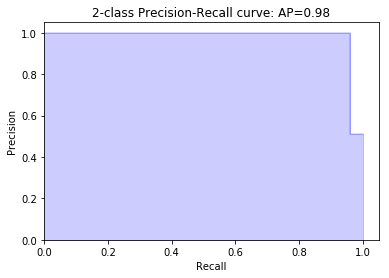

In [23]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

numeric_preds = [1 if cls == "ACTIVE" else 0 for cls in test['class']]

precision, recall, _ = precision_recall_curve(numeric_preds, predictions)

average_precision = average_precision_score(numeric_preds, predictions)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt;


In [24]:
list(zip(train[features], clf.feature_importances_))

[('mol_weight', 0.35644436080349723),
 ('rot_bonds', 0.12553858762892),
 ('h_donors', 0.05660302533876446),
 ('h_acceptors', 0.1896527859106067),
 ('log_p', 0.2717612403182118)]

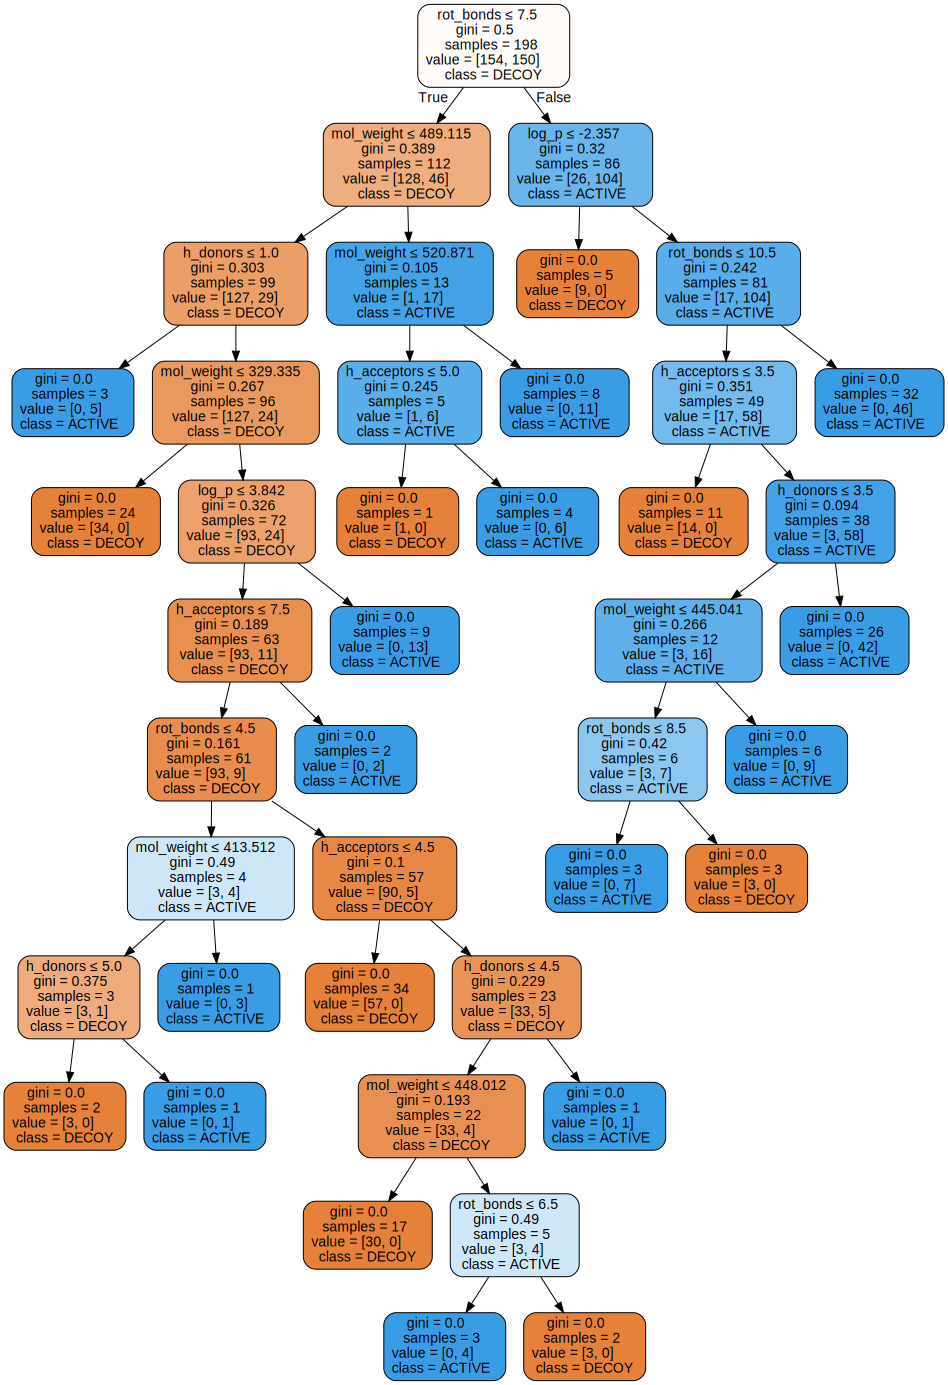

In [25]:
from sklearn import tree
import graphviz

# just one three for an example
trees =  [estimator for estimator in clf.estimators_]
single_tree = trees[0]

dot_data = tree.export_graphviz(single_tree, out_file=None, 
                         feature_names=features,  
                         class_names=target_classes,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


# Practical Tasks

You are required to:

* Compute Accuracy of Model (plot a ROC curve)
* Build a Naive Bayes Classifier Model
* Test the models on more data (what is the accuracy?)
* Investigate the use of more training data
* Investigate the use of unbalanced sets for 
    1. Training
    2. Testing
